# Proyección de Variables Macroeconómicas ARIMA

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.express as px
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [150]:
data = pd.read_csv('data_modelo.csv', delimiter=',', index_col=0 ,parse_dates=True, decimal='.')
#data.head()

In [151]:
# Sin pandemia
data1 = data['2014-02-01':'2020-02-01']
#data1.tail()

In [152]:
# data original
data_nodiff = pd.read_csv('df_m.csv', delimiter=',', index_col=0 ,parse_dates=True, decimal='.')
data_nodiff = data_nodiff['2014-02-01':'2020-03-01']

In [153]:
# data para graficar
index = range(data1.shape[0])
data_graf = data1.copy()
data_graf.index = index 
#data_graf

In [154]:
def modelo(data, d,var):
    model = pm.auto_arima(data[var], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=d,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
    return model
    #print(model.summary())

In [155]:
# Forecast
def forecast (data, periodos, variable, data_grafico):
    n_periods = periodos
    fc, confint = globals()['modelo_'+variable].predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = np.arange(len(data[variable]), len(data[variable])+n_periods)

    # make series for plotting purpose
    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)
    
    pronosticos = pd.concat([lower_series, fc_series, upper_series], axis=1) 
    pronosticos.columns = ['lower','media','upper']
    
    # Plot
    x = range(data.shape[0])
    plt.plot(data_grafico[variable])
    plt.plot(fc_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color='k', alpha=.15)

    plt.title("Final Forecast")
    plt.show()
    
    return pronosticos

In [156]:
def cambio(data, variable):
    ultimo_valor =data.shape[0]-1
    ultimo_valor
    s = pd.Series(data[variable])
    t = pd.Series(globals()['pronostico_'+variable]['media'])
    t.iloc[0] = np.log(s.iat[ultimo_valor])
    estimados = np.exp(t.cumsum())

    # intervalo inferior
    t_l = pd.Series(globals()['pronostico_'+variable]['lower'])
    t_l.iloc[0] = np.log(s.iat[ultimo_valor])
    estimados_l = np.exp(t_l.cumsum())
    estimados_l.index = estimados.index

    # intervalo superior
    t_u = pd.Series(globals()['pronostico_'+variable]['upper'])
    t_u.iloc[0] = np.log(s.iat[ultimo_valor])
    estimados_u = np.exp(t_u.cumsum())
    estimados_u.index = estimados.index
    
    print("Crea un dataframe con el nombre forecast_",format(variable))
    
    d = {'l_inferior': estimados_l ,'estimados': estimados, 'l_superior': estimados_u}
    globals()['forecast_'+variable]= pd.DataFrame(d)
    return(globals()['forecast_'+variable])


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-398.813, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-423.523, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-448.813, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-400.807, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-448.249, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-446.875, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-450.923, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-450.526, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-449.796, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-425.498, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-448.206, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.836 seconds


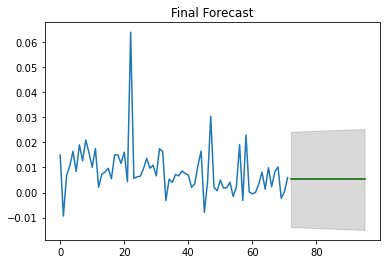

Crea un dataframe con el nombre forecast_ consumo


,l_inferior,estimados,l_superior
72,12650.700000,12650.700000,12650.700000
73,12477.124034,12716.873425,12961.229628
74,12305.307245,12783.392991,13280.053323
75,12135.244289,12850.260508,13607.405932
76,11966.929555,12917.477797,13943.529278
77,11800.357167,12985.046686,14288.672373
78,11635.520992,13052.969016,14643.091637
79,11472.414648,13121.246634,15007.051133
80,11311.031511,13189.881400,15380.822800
81,11151.364720,13258.875181,15764.686698


In [157]:
#data, diferencia,variable
modelo_consumo =modelo(data1, 1,'consumo')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_consumo = forecast (data1, 24, 'consumo', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'consumo')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-719.686, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-704.902, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-708.886, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-715.253, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-706.861, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-717.510, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-687.325, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-730.130, Time=0.09 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-726.027, Time=0.16 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-723.901, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-725.567, Time=0.08 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.936 seconds


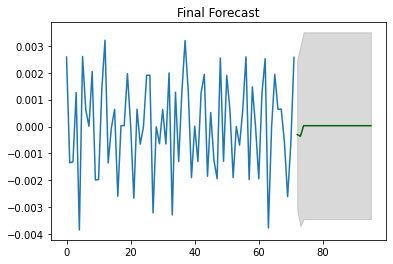

Crea un dataframe con el nombre forecast_ banano


,l_inferior,estimados,l_superior
72,1.500000,1.500000,1.500000
73,1.494437,1.499457,1.504493
74,1.489292,1.499503,1.509783
75,1.484165,1.499549,1.515091
76,1.479056,1.499594,1.520418
77,1.473964,1.499640,1.525764
78,1.468890,1.499686,1.531128
79,1.463833,1.499732,1.536511
80,1.458794,1.499778,1.541914
81,1.453772,1.499824,1.547335


In [159]:
modelo_banano = modelo(data1, 0,'banano')
pronostico_banano = forecast (data1, 24, 'banano', data_graf)
cambio(data_nodiff, 'banano')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-372.025, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-283.438, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-321.959, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-285.409, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-379.892, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-350.109, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-380.890, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-355.207, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-380.085, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-378.133, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-386.637, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-357.201, Time=0.05 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=i

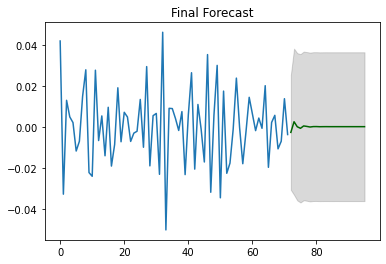

Crea un dataframe con el nombre forecast_ bvpsi


,l_inferior,estimados,l_superior
72,425.600000,425.600000,425.600000
73,411.706076,426.673560,442.185184
74,397.194298,426.703933,458.405992
75,382.798814,426.411890,474.993896
76,369.323564,426.613389,492.790066
77,356.237069,426.713210,511.131995
78,343.506657,426.690519,530.018255
79,331.297620,426.753409,549.712588
80,319.526589,426.821630,570.145677
81,308.150713,426.858738,591.296318


In [160]:
modelo_bvpsi = modelo(data1, 1,'bvpsi')
pronostico_bvpsi = forecast (data1, 24, 'bvpsi', data_graf)
cambio(data_nodiff, 'bvpsi')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-398.754, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-431.131, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-447.438, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-400.734, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-446.242, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-443.951, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-445.489, Time=0.00 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.383 seconds


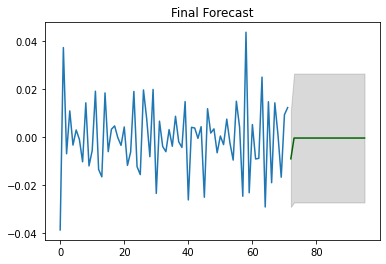

Crea un dataframe con el nombre forecast_ construcción


,l_inferior,estimados,l_superior
72,6238.300000,6238.300000,6238.300000
73,6070.755590,6236.351933,6406.465367
74,5907.710983,6234.404475,6579.163956
75,5749.045329,6232.457625,6756.517966
76,5594.641018,6230.511383,6938.652895
77,5444.383603,6228.565749,7125.697621
78,5298.161709,6226.620722,7317.784497
79,5155.866953,6224.676303,7515.049444
80,5017.393861,6222.732490,7717.632046
81,4882.639794,6220.789285,7925.675652


In [161]:
modelo_construcción = modelo(data1,0 ,'construcción')
pronostico_construcción = forecast (data1, 24, 'construcción', data_graf)
cambio(data_nodiff, 'construcción')

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=235.273, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=203.338, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=190.767, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=189.554, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=191.513, Time=0.04 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 0.564 seconds


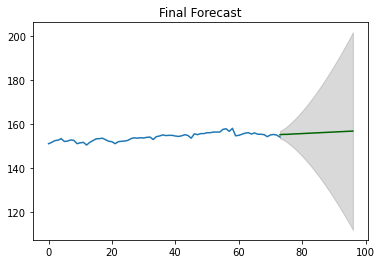

In [162]:
# El IPC lo debo tomar de otra data porque en la data tratada ya fue eliminado
data0 = data_nodiff.copy()
#data0['ipc_log'] = np.log(data0['ipc']).diff()
#data10 = data0.dropna()
data10 = data0['2014-02-01':'2020-02-01']

index = range(data0.shape[0])
data_graf0 = data0.copy()
data_graf0.index = index 
#data_graf0['ipc_log'] = np.log(data0['ipc']).diff()

modelo_ipc = modelo(data10, 2,'ipc')
pronostico_ipc = forecast(data10, 24, 'ipc', data_graf0)
#cambio(data0, 'ipc')

In [163]:
pronostico_ipc.index = pronostico_mora.index 
pronostico_ipc

,lower,media,upper
72,153.407818,155.098843,156.789867
73,152.820910,155.245453,157.669996
74,151.868539,155.241079,158.613618
75,150.755661,155.311145,159.866629
76,149.561090,155.412529,161.263969
77,148.265540,155.469342,162.673144
78,146.848814,155.534665,164.220517
79,145.354357,155.612539,165.870721
80,143.773183,155.682314,167.591445
81,142.107083,155.750471,169.393859


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-345.104, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-368.549, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-347.103, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-377.406, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-376.512, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-389.121, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-385.981, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-383.996, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-389.891, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-391.630, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-393.501, T

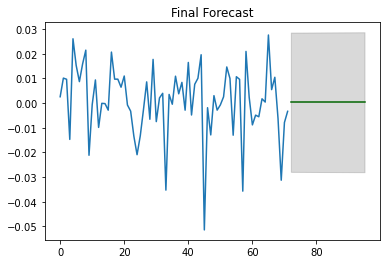

Crea un dataframe con el nombre forecast_ comercio


,l_inferior,estimados,l_superior
72,11268.600000,11268.600000,11268.600000
73,10958.644436,11272.690605,11595.736518
74,10657.153751,11276.782694,11932.438144
75,10363.898468,11280.876269,12278.986503
76,10078.655281,11284.971330,12635.671563
77,9801.206895,11289.067878,13002.791891
78,9531.341865,11293.165912,13380.654910
79,9268.854434,11297.265434,13769.577158
80,9013.544391,11301.366445,14169.884563
81,8765.216914,11305.468944,14581.912724


In [165]:
modelo_comercio = modelo(data1, 1,'comercio')
pronostico_comercio = forecast (data1, 24, 'comercio', data_graf)
cambio(data_nodiff, 'comercio')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-77.851, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-98.798, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-79.851, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-98.239, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-100.795, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-100.236, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.564 seconds


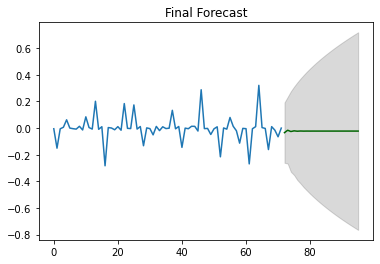

Crea un dataframe con el nombre forecast_ ied_empresas


,l_inferior,estimados,l_superior
72,242.816125,242.816125,2.428161e+02
73,185.969319,238.858403,3.067890e+02
74,133.910922,232.739385,4.045049e+02
75,94.091821,227.916119,5.520752e+02
76,63.731032,222.605011,7.775332e+02
77,42.046211,217.719665,1.127375e+03
78,26.966135,212.786011,1.679065e+03
79,16.873791,208.044149,2.565065e+03
80,10.305027,203.366787,4.013386e+03
81,6.152689,198.815767,6.424461e+03


In [166]:
modelo_ied_empresas = modelo(data1, 1,'ied_empresas')
pronostico_ied_empresas = forecast(data1, 24, 'ied_empresas', data_graf)
cambio(data_nodiff, 'ied_empresas')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-105.695, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-140.600, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-107.639, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-149.186, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-153.049, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-155.023, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-151.148, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 1.698 seconds


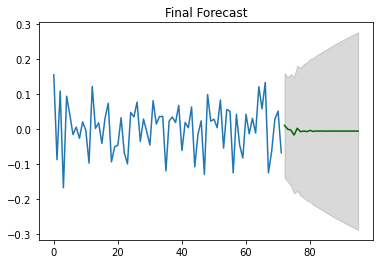

Crea un dataframe con el nombre forecast_ mcp


,l_inferior,estimados,l_superior
72,626423.000000,626423.000000,6.264230e+05
73,539221.833822,626015.578724,7.267797e+05
74,458091.594452,623858.674632,8.496110e+05
75,381020.392635,612978.582648,9.861486e+05
76,319174.874102,614089.302766,1.181502e+06
77,263846.633007,609167.791718,1.406444e+06
78,216621.118010,605462.392896,1.692285e+06
79,176486.373434,600818.125762,2.045384e+06
80,143290.943252,598234.247826,2.497605e+06
81,115361.966622,593864.104049,3.057113e+06


In [167]:
modelo_mcp = modelo(data1, 1,'mcp')
pronostico_mcp = forecast(data1, 24, 'mcp', data_graf)
cambio(data_nodiff, 'mcp')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=189.131, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=169.136, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=187.137, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5.949, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-16.640, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-18.640, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3.950, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 1.593 seconds


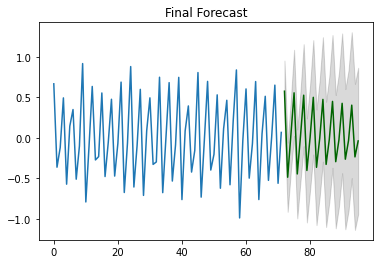

Crea un dataframe con el nombre forecast_ itdm


,l_inferior,estimados,l_superior
72,192.600000,192.600000,1.926000e+02
73,77.430806,118.585780,1.816149e+02
74,51.475654,122.630856,2.921445e+02
75,52.749493,213.572122,8.647107e+02
76,19.553924,136.943453,9.590663e+02
77,11.457149,139.693537,1.703241e+03
78,10.342005,236.317395,5.399911e+03
79,3.647412,158.170388,6.859076e+03
80,1.922242,159.012390,1.315388e+04
81,1.565724,262.020169,4.384844e+04


In [168]:
#data, diferencia,variable
modelo_itdm =modelo(data1, 1,'itdm')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_itdm = forecast (data1, 24, 'itdm', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'itdm')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-92.502, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-141.751, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-94.473, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-147.512, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-145.854, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-162.014, Time=0.24 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-158.320, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.20 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 2.863 seconds


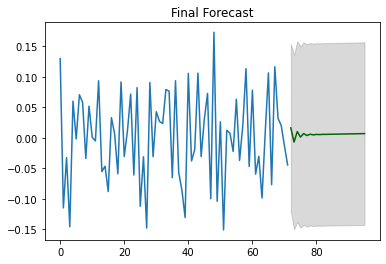

Crea un dataframe con el nombre forecast_ acp_tbm


,l_inferior,estimados,l_superior
72,1210.000000,1210.000000,1210.000000
73,1040.764547,1201.443706,1386.929428
74,906.472479,1213.731747,1625.140076
75,781.878504,1215.214506,1888.715817
76,677.854988,1223.633187,2208.847324
77,585.837535,1228.321010,2575.411119
78,507.261678,1235.480965,3009.123856
79,438.791873,1241.449620,3512.364867
80,379.834033,1248.378504,4102.973287
81,328.708020,1255.004361,4791.595724


In [169]:
#data, diferencia,variable
modelo_acp_tbm =modelo(data1, 1,'acp_tbm')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_acp_tbm = forecast (data1, 24, 'acp_tbm', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'acp_tbm')

In [171]:
# Ojo con la proyeccion de la variable ENTRADA

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-94.568, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-81.512, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-93.499, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-90.926, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=475.088, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-92.021, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-94.047, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-89.531, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-92.225, Time=0.25 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-96.069, Time=0.26 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-94.393, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-89.558, Time=0.29 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-95.705, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-91.438, Time=0.27 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-86.6

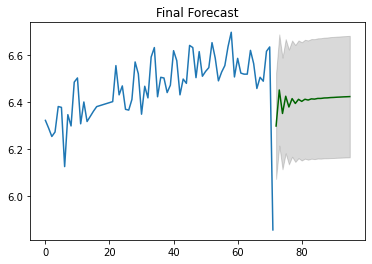

72    357.000000
73    633.894237
74    573.771212
75    617.365800
76    589.765696
Name: media, dtype: float64

In [172]:
#data, diferencia,variable
modelo_entrada =modelo(data1, 0,'entrada')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_entrada = forecast (data1, 24, 'entrada', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
#cambio(data_nodiff, 'entrada')
# Este es el calcu
ultimo_valor =data_nodiff.shape[0]-1
#print(ultimo_valor)
s = pd.Series(data_nodiff['entrada'])
#print(s)
t = pd.Series(pronostico_entrada['media'])
#print(t)
t.iloc[0] = np.log(s.iat[ultimo_valor])
#print(t)
#print(np.log(s.iat[ultimo_valor]))
#print(np.exp(np.log(s.iat[ultimo_valor])))
forecast_entrada = np.exp(t)
forecast_entrada.head()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-138.159, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-141.265, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-143.316, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-140.034, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-151.507, Time=0.31 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-149.991, Time=0.33 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-147.770, Time=0.19 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0] intercept
Total fit time: 2.635 seconds


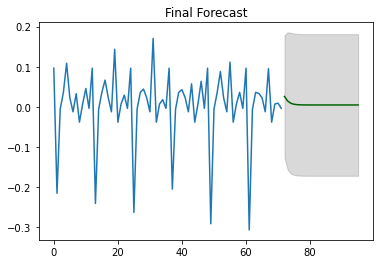

Crea un dataframe con el nombre forecast_ pib_const_f


,l_inferior,estimados,l_superior
72,595.105020,595.105020,595.105020
73,508.416688,603.652163,716.726934
74,430.143180,608.889806,861.914854
75,362.776254,612.698023,1034.794485
76,305.604013,615.896360,1241.241315
77,257.322306,618.839130,1488.257565
78,216.626776,621.678987,1784.104300
79,182.352418,624.481620,2138.591288
80,153.495591,627.275296,2563.424108
81,129.203380,630.072194,3072.605147


In [173]:
#data, diferencia,variable
modelo_pib_const_f =modelo(data1, 0,'pib_const_f')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_pib_const_f = forecast (data1, 24, 'pib_const_f', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'pib_const_f')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-203.324, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-229.819, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-254.240, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-205.130, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-242.840, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-258.176, Time=0.39 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-261.756, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-262.439, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-249.174, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-261.959, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-258.135, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-258.634, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-255.979, Time=0.16 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] i

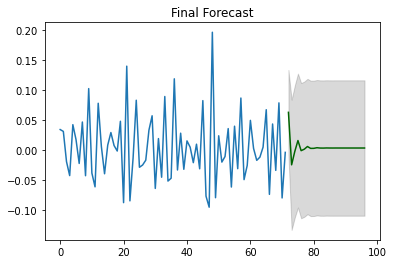

Crea un dataframe con el nombre forecast_ gasolina


,l_inferior,estimados,l_superior
72,491.500000,491.500000,491.500000
73,430.114116,479.388810,534.308507
74,384.254429,478.065985,594.780617
75,349.069873,485.536345,675.353449
76,311.455224,484.866951,754.830687
77,278.574256,485.390672,845.749738
78,250.257797,488.089287,951.942977
79,224.110737,489.273052,1068.168898
80,200.712820,490.501930,1198.688469
81,179.939381,492.232950,1346.527237


In [174]:
#data, diferencia,variable
modelo_gasolina =modelo(data1, 0,'gasolina')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_gasolina = forecast (data1, 25, 'gasolina', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'gasolina')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-115.653, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-155.549, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-117.650, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-183.418, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-196.521, Time=0.17 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-236.194, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-232.641, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.24 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept
Total fit time: 2.164 seconds


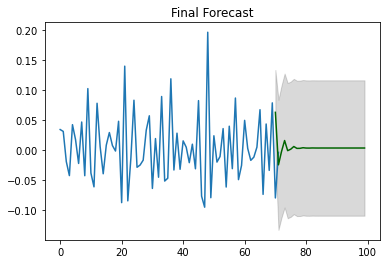

70    656.200000
71    640.030391
72    638.264292
73    648.237945
74    647.344239
75    648.043456
76    651.646368
77    653.226809
78    654.867480
79    657.178560
80    659.135795
81    661.057508
82    663.129516
83    665.147736
84    667.153721
85    669.195765
86    671.234901
87    673.274722
88    675.326707
89    677.383766
90    679.445663
91    681.514972
92    683.590487
93    685.671985
94    687.760027
95    689.854437
96    691.955150
97    694.062296
98    696.175866
99    698.295856
Name: media, dtype: float64


In [175]:
# Se toma una fecha diferente para la variable gasolina en vista que ella genera un 
# cambio en la variable en el mes de febrero y no en marzo como el resto de las variables
data2 = data['2014-02-01':'2019-12-01']
#data, diferencia,variable
modelo_gasolina1 =modelo(data2, 1,'gasolina')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_gasolina1 = forecast(data2, 30, 'gasolina', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
#cambio(data_nodiff, 'gasolina')

ultimo_valor =data2.shape[0]-1
ultimo_valor
s = pd.Series(data_nodiff['gasolina'])
#print(s)
t = pd.Series(pronostico_gasolina1['media'])
#print(t)
t.iloc[0] = np.log(s.iat[ultimo_valor])
#print(t)
forecast_gasolina1 = np.exp(t.cumsum())
print(forecast_gasolina1)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-197.223, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-151.689, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-191.836, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-189.941, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-153.634, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-199.241, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-200.779, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-199.379, Time=0.10 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-197.476, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-202.625, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-193.710, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-201.227, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-201.088, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-199.067, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0]          

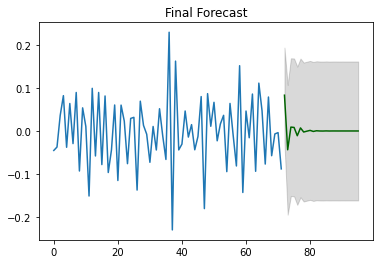

Crea un dataframe con el nombre forecast_ vacuno


,l_inferior,estimados,l_superior
72,30985.000000,30985.000000,3.098500e+04
73,25503.851169,29658.981612,3.449107e+04
74,21928.815693,29927.601604,4.084404e+04
75,18833.559844,30174.714762,4.834526e+04
76,15861.072143,29843.267123,5.615135e+04
77,13594.743185,30056.667715,6.645240e+04
78,11538.829218,29984.019706,7.791444e+04
79,9812.812828,29970.305573,9.153535e+04
80,8359.998976,30010.549488,1.077312e+05
81,7105.051829,29978.424814,1.264883e+05


In [176]:
#data, diferencia,variable
modelo_vacuno =modelo(data1, 0,'vacuno')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_vacuno = forecast (data1, 24, 'vacuno', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'vacuno')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=165.224, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=139.091, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=163.233, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=107.089, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=93.396, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=91.397, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=105.092, Time=0.02 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=71.361, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=70.206, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=71.397, Time=0.11 sec
 ARIMA(

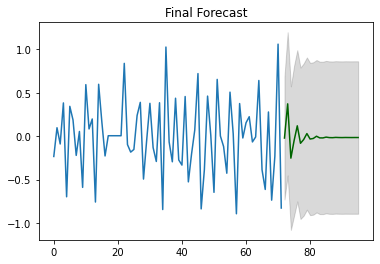

Crea un dataframe con el nombre forecast_ pconst


,l_inferior,estimados,l_superior
72,159426.000000,159426.000000,1.594260e+05
73,101385.370305,231449.782557,5.283701e+05
74,34401.416749,179640.781968,9.380663e+05
75,13749.051438,170495.755466,2.114241e+06
76,6477.186087,192138.101022,5.699551e+06
77,2492.785381,176999.509953,1.256780e+07
78,997.460726,170313.849751,2.908065e+07
79,427.246463,175484.395131,7.207730e+07
80,171.820483,169774.372102,1.677526e+08
81,69.512020,165343.753523,3.932925e+08


In [177]:
#data, diferencia,variable
modelo_pconst =modelo(data1, 1,'pconst')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_pconst = forecast (data1, 24, 'pconst', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'pconst')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-181.244, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-174.709, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-179.253, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-180.967, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-175.897, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-180.307, Time=0.22 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-179.809, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-178.051, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-178.010, Time=0.28 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-179.139, Time=0.06 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.247 seconds


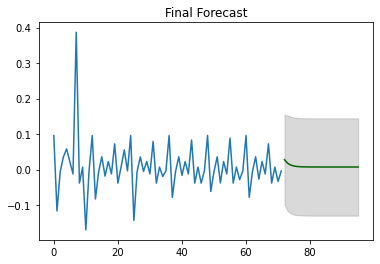

Crea un dataframe con el nombre forecast_ pib_const_e


,l_inferior,estimados,l_superior
72,162.778469,162.778469,162.778469
73,144.772839,165.634483,189.502272
74,127.863297,167.682088,219.901124
75,112.584741,169.317928,254.639842
76,98.990989,170.747354,294.518309
77,86.978745,172.075751,340.428732
78,76.398207,173.356972,393.368389
79,67.093371,174.618491,454.465427
80,58.916796,175.874323,525.007796
81,51.734475,177.131627,606.473986


In [178]:
#data, diferencia,variable
modelo_pib_const_e =modelo(data1, 0,'pib_const_e')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_pib_const_e = forecast (data1, 24, 'pib_const_e', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'pib_const_e')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-465.570, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-498.289, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-511.730, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-467.570, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-518.661, Time=0.42 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-516.628, Time=0.37 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-514.644, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-515.522, Time=0.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-514.158, Time=0.29 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-512.489, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-520.650, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, T

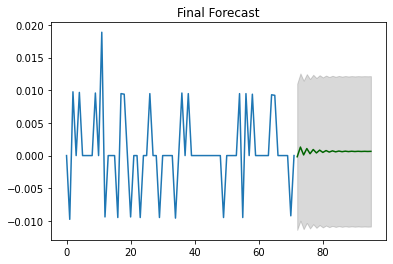

Crea un dataframe con el nombre forecast_ activar


,l_inferior,estimados,l_superior
72,0.090000,0.090000,0.090000
73,0.089107,0.090117,0.091138
74,0.088110,0.090126,0.092189
75,0.087206,0.090223,0.093345
76,0.086239,0.090249,0.094444
77,0.085337,0.090332,0.095619
78,0.084399,0.090369,0.096761
79,0.083506,0.090444,0.097958
80,0.082593,0.090487,0.099136
81,0.081713,0.090556,0.100357


In [180]:
#data, diferencia,variable
modelo_activar =modelo(data1, 1,'activar')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_activar = forecast (data1, 24, 'activar', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'activar')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-482.518, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-441.877, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-450.395, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-443.874, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-486.683, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-465.017, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-483.022, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-481.947, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-469.777, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-483.135, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-486.909, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-483.115, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-

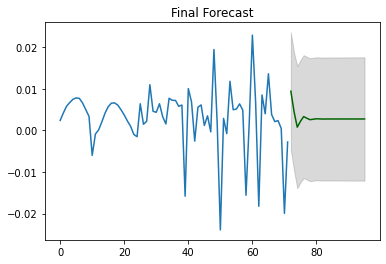

Crea un dataframe con el nombre forecast_ imae_s


,l_inferior,estimados,l_superior
72,347.790000,347.790000,347.790000
73,344.445026,349.367289,354.359893
74,339.688486,349.644067,359.891426
75,335.470097,350.414740,366.025142
76,331.654942,351.587211,372.717398
77,327.749792,352.621684,379.381025
78,323.778350,353.536557,386.029816
79,319.890894,354.494387,392.841037
80,316.081704,355.492323,399.816851
81,312.306765,356.481495,406.904591


In [181]:
#data, diferencia,variable
modelo_imae_s =modelo(data1, 1,'imae_s')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_imae_s = forecast (data1, 24, 'imae_s', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'imae_s')

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-112.480, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-149.235, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-114.468, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-168.164, Time=0.06 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-172.554, Time=0.11 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-191.383, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0] intercept
Total fit time: 1.537 seconds


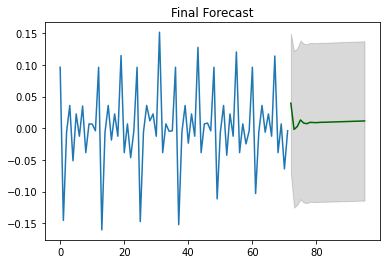

Crea un dataframe con el nombre forecast_ pib_const_i


,l_inferior,estimados,l_superior
72,557.960964,557.960964,557.960964
73,492.269362,556.939699,630.105898
74,436.222542,558.412335,714.828571
75,389.931225,565.784791,820.945874
76,346.808488,570.408851,938.172707
77,308.171943,574.548738,1071.175557
78,274.382122,579.921416,1225.695196
79,244.232696,585.198993,1402.178610
80,217.342919,590.383422,1603.698831
81,193.494008,595.874473,1835.025239


In [187]:
#data, diferencia,variable
modelo_pib_const_i =modelo(data1, 1,'pib_const_i')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_pib_const_i = forecast (data1, 24, 'pib_const_i', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'pib_const_i')

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-69.297, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-52.730, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-68.942, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-64.031, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=495.212, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-67.524, Time=0.13 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-68.220, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-64.941, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-69.281, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-66.229, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-57.761, Time=0.07 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.007 seconds


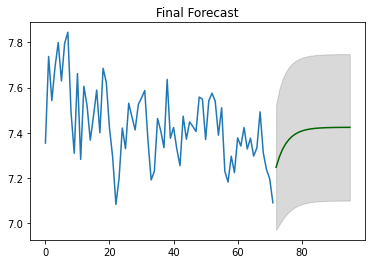

72    1496.700000
73    1470.402460
74    1520.742784
75    1559.293837
76    1588.595583
77    1610.743014
78    1627.413475
79    1639.922656
80    1649.287728
81    1656.286963
82    1661.511374
83    1665.407323
84    1668.310567
85    1670.472919
86    1672.082825
87    1673.281078
88    1674.172747
89    1674.836167
90    1675.329707
91    1675.696835
92    1675.969911
93    1676.173020
94    1676.324083
95    1676.436434
Name: media, dtype: float64


In [242]:
#data, diferencia,variable
modelo_zl_mtm =modelo(data1, 0,'zl_mtm')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_zl_mtm = forecast (data1, 24, 'zl_mtm', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
#cambio(data_nodiff, 'zl_mtm')

ultimo_valor =data2.shape[0]-1
ultimo_valor
s = pd.Series(data_nodiff['zl_mtm'])
#print(s)
t = pd.Series(pronostico_zl_mtm['media'])
#print(t)
t.iloc[0] = np.log(s.iat[ultimo_valor])
#print(t)
forecast_zl_mtm = np.exp(t)
print(forecast_zl_mtm)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-186.634, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-191.236, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-211.661, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-188.631, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-213.870, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-213.032, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-212.958, Time=0.18 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-211.026, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-213.737, Time=0.10 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 1.109 seconds


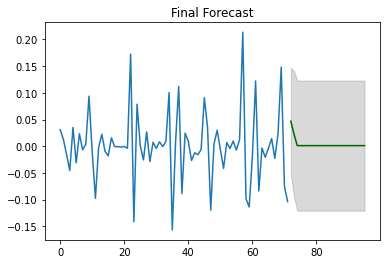

Crea un dataframe con el nombre forecast_ itmbs


,l_inferior,estimados,l_superior
72,57.700000,57.700000,57.700000
73,52.438016,59.014791,66.416426
74,46.474200,59.084478,75.116420
75,41.188654,59.154247,84.956041
76,36.504237,59.224099,96.084569
77,32.352582,59.294033,108.670841
78,28.673098,59.364049,122.905809
79,25.412085,59.434148,139.005438
80,22.521949,59.504330,157.213983
81,19.960510,59.574595,177.807695


In [238]:
#data, diferencia,variable
modelo_itmbs =modelo(data1, 0,'itmbs')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_itmbs = forecast (data1, 24, 'itmbs', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'itmbs')

#data, diferencia,variable
modelo_pib_const_e =modelo(data1, 0,'pib_const_e')
# Proyeccion
#data, periodos, variable, data_grafico
pronostico_pib_const_e = forecast (data1, 24, 'pib_const_e', data_graf)
# Pronostico Real
#data = data sin diferenciar, variable
cambio(data_nodiff, 'pib_const_e')

In [243]:
# Proyecciones promedios
a = pd.Series(forecast_banano['estimados'])
b = pd.Series(forecast_bvpsi['estimados'])
c = pd.Series(forecast_construcción['estimados'])
d = pd.Series(forecast_consumo['estimados'])
f = pd.Series(pronostico_ipc['media'])
g = pd.Series(forecast_comercio['estimados'])
h = pd.Series(forecast_ied_empresas['estimados'])
i = pd.Series(forecast_mcp['estimados'])
j = pd.Series(forecast_itdm['estimados'])
k = pd.Series(forecast_acp_tbm['estimados'])
m = pd.Series(forecast_entrada)
n = pd.Series(forecast_pib_const_f['estimados'])
o = pd.Series(forecast_gasolina1)
p = pd.Series(forecast_vacuno['estimados'])
q = pd.Series(forecast_pconst['estimados'])
r = pd.Series(forecast_pib_const_e['estimados'])
t = pd.Series(forecast_activar['estimados'])
u = pd.Series(forecast_imae_s['estimados'])
v = pd.Series(forecast_pib_const_i['estimados'])
w = pd.Series(forecast_zl_mtm)
x = pd.Series(forecast_itmbs['estimados'])

d1 = {'banano': a ,'bvpsi': b, 'construcción': c, 'consumo':d, 'ipc':f
     , 'comercio':g, 'ied_empresas':h, 'mcp':i, 'itdm':j, 'acp_tbm':k, 'entrada':m, 'pib_const_f':n,
      'gasolina':o, 'vacuno':p, 'pconst':q, 'pib_const_e':r, 'activar':t, 'imae_s':u, 'pib_const_i':v,
      'zl_mtm':w, 'itmbs':x}
proyeccion_prom = pd.DataFrame(d1)
#proyeccion_prom
proyeccion_prom = proyeccion_prom.dropna()

In [244]:
index = ['2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01','2020-10-01'
         ,'2020-11-01','2020-12-01','2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01'
         ,'2021-06-01','2021-07-01','2021-08-01','2021-09-01','2021-10-01','2021-11-01','2021-12-01'
         ,'2022-01-01', '2022-02-01', '2022-03-01']

In [245]:
proyeccion_prom.index = index

In [247]:
proyeccion_prom.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2020-04-01 to 2022-03-01
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   banano        24 non-null     float64
 1   bvpsi         24 non-null     float64
 2   construcción  24 non-null     float64
 3   consumo       24 non-null     float64
 4   mora          24 non-null     float64
 5   ipc           24 non-null     float64
 6   comercio      24 non-null     float64
 7   ied_empresas  24 non-null     float64
 8   mcp           24 non-null     float64
 9   itdm          24 non-null     float64
 10  acp_tbm       24 non-null     float64
 11  mora_g21      24 non-null     float64
 12  entrada       24 non-null     float64
 13  pib_const_f   24 non-null     float64
 14  gasolina      24 non-null     float64
 15  vacuno        24 non-null     float64
 16  pconst        24 non-null     float64
 17  pib_const_e   24 non-null     float64
 18  mora_g11      24 non

In [248]:
print(proyeccion_prom.iloc[:1,5:])

                   ipc  comercio  ied_empresas       mcp   itdm  acp_tbm  \
2020-04-01  155.098843   11268.6    242.816125  626423.0  192.6   1210.0   

            mora_g21  entrada  pib_const_f    gasolina  ...  activar  imae_s  \
2020-04-01    0.0274    357.0    595.10502  638.264292  ...     0.09  347.79   

            pib_const_i  zl_mtm  itmbs  d2015_06  d2015_03  d2019_08  \
2020-04-01   557.960964  1496.7   57.7         0         0         0   

            d2018_07  d2018_08  
2020-04-01         0         0  

[1 rows x 24 columns]


In [ ]:
#pip install skforecast

In [249]:
proyeccion_prom1.to_csv('proyeccion_prom.csv', header = True, index= True)

In [97]:
#d1

In [189]:
data_nodiff1 = pd.read_csv('df_m.csv', delimiter=',', index_col=0 ,parse_dates=True, decimal='.')

In [191]:
pd.Series(data_nodiff1['pib_const_i'].values).head(60)

0     420.433912
1     418.729339
2     461.131106
3     398.575660
4     396.142837
5     410.680053
6     390.107861
7     399.041563
8     394.045107
9     408.144894
10    392.701948
11    395.410074
12    398.041232
13    396.427446
14    436.570858
15    371.699412
16    369.430636
17    382.987597
18    375.888621
19    384.496694
20    379.682357
21    425.946905
22    409.830386
23    412.656633
24    393.886334
25    392.289393
26    432.013774
27    372.683549
28    370.408766
29    384.001622
30    388.543201
31    397.441072
32    392.464656
33    456.833431
34    439.548261
35    442.579446
36    440.485523
37    438.699654
38    483.123675
39    414.777063
40    412.245350
41    427.373478
42    417.396795
43    426.955430
44    421.609460
45    479.165514
46    461.035367
47    464.214730
48    468.037836
49    466.140262
50    513.342999
51    459.072864
52    456.270779
53    473.014504
54    453.249843
55    463.629534
56    457.824363
57    516.548324
58    497.0037

In [148]:
proyeccion_prom['imae_s']

2020-04-01    347.790000
2020-05-01    349.367289
2020-06-01    349.644067
2020-07-01    350.414740
2020-08-01    351.587211
2020-09-01    352.621684
2020-10-01    353.536557
2020-11-01    354.494387
2020-12-01    355.492323
2021-01-01    356.481495
2021-02-01    357.461958
2021-03-01    358.448405
2021-04-01    359.441071
2021-05-01    360.435557
2021-06-01    361.431728
2021-07-01    362.430914
2021-08-01    363.433187
2021-09-01    364.438158
2021-10-01    365.445810
2021-11-01    366.456268
2021-12-01    367.469550
2022-01-01    368.485628
2022-02-01    369.504506
2022-03-01    370.526204
Name: imae_s, dtype: float64